In [93]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn.decomposition import RandomizedPCA
import numpy as np
import scipy.stats as stats

df = pd.read_pickle('../data/relationship_features_forclustering_daily.pandas_df')

df = df[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]

df = df[df["message_count"]!=0]

df_high= pd.read_pickle('../data/relationship_features_high')

df_low = pd.read_pickle('../data/relationship_features_low')

df_high = df_high[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]
df_low = df_low[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]

df.fillna(0,inplace = True)
df_high.fillna(0,inplace = True)
df_low.fillna(0,inplace = True)


In [94]:
df_high['label']=1
df_low['label']=0

label_data = pd.concat([df_high,df_low])

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

train, test = train_test_split(label_data, test_size = 0.2)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

predictors =["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]

X_train = train[predictors]
y_train = train["label"]

X_test = test[predictors]
y_test = test["label"]

model = LogisticRegression()
model = model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

In [96]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,message_count,[15.891609353]
1,compound,[0.00935825074794]
2,word_count,[7.44079817625]
3,message_count_reciprocity,[-0.843196085779]
4,word_count_reciprocity,[1.12004071994]
5,response_time,[-1.45327469814]
6,response_time_reciprocity,[1.85164935608]
7,sentiment_reciprocity,[-0.080194203958]


In [97]:
# generate class probabilities
predicted = model.predict(X_test)
print predicted

probs = model.predict_proba(X_test)
print probs


[0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1
 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0
 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1
 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0
 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1
 0 0 0 1 1 1 1 1 1 1 0 1 

In [98]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.820675105485
0.91733339273


In [99]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[375  85]
 [ 85 403]]
             precision    recall  f1-score   support

          0       0.82      0.82      0.82       460
          1       0.83      0.83      0.83       488

avg / total       0.82      0.82      0.82       948



In [100]:
# evaluate the model using 10-fold cross-validation

X = label_data[predictors]
y = label_data["label"]
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.80379747  0.8628692   0.89240506  0.85654008  0.83966245  0.82067511
  0.8649789   0.8628692   0.83966245  0.80720339]
0.845066330544


In [101]:
output = model.predict_proba(df)
positive =output[:,1]

print positive.mean()

df["output"] = positive




0.490697311483


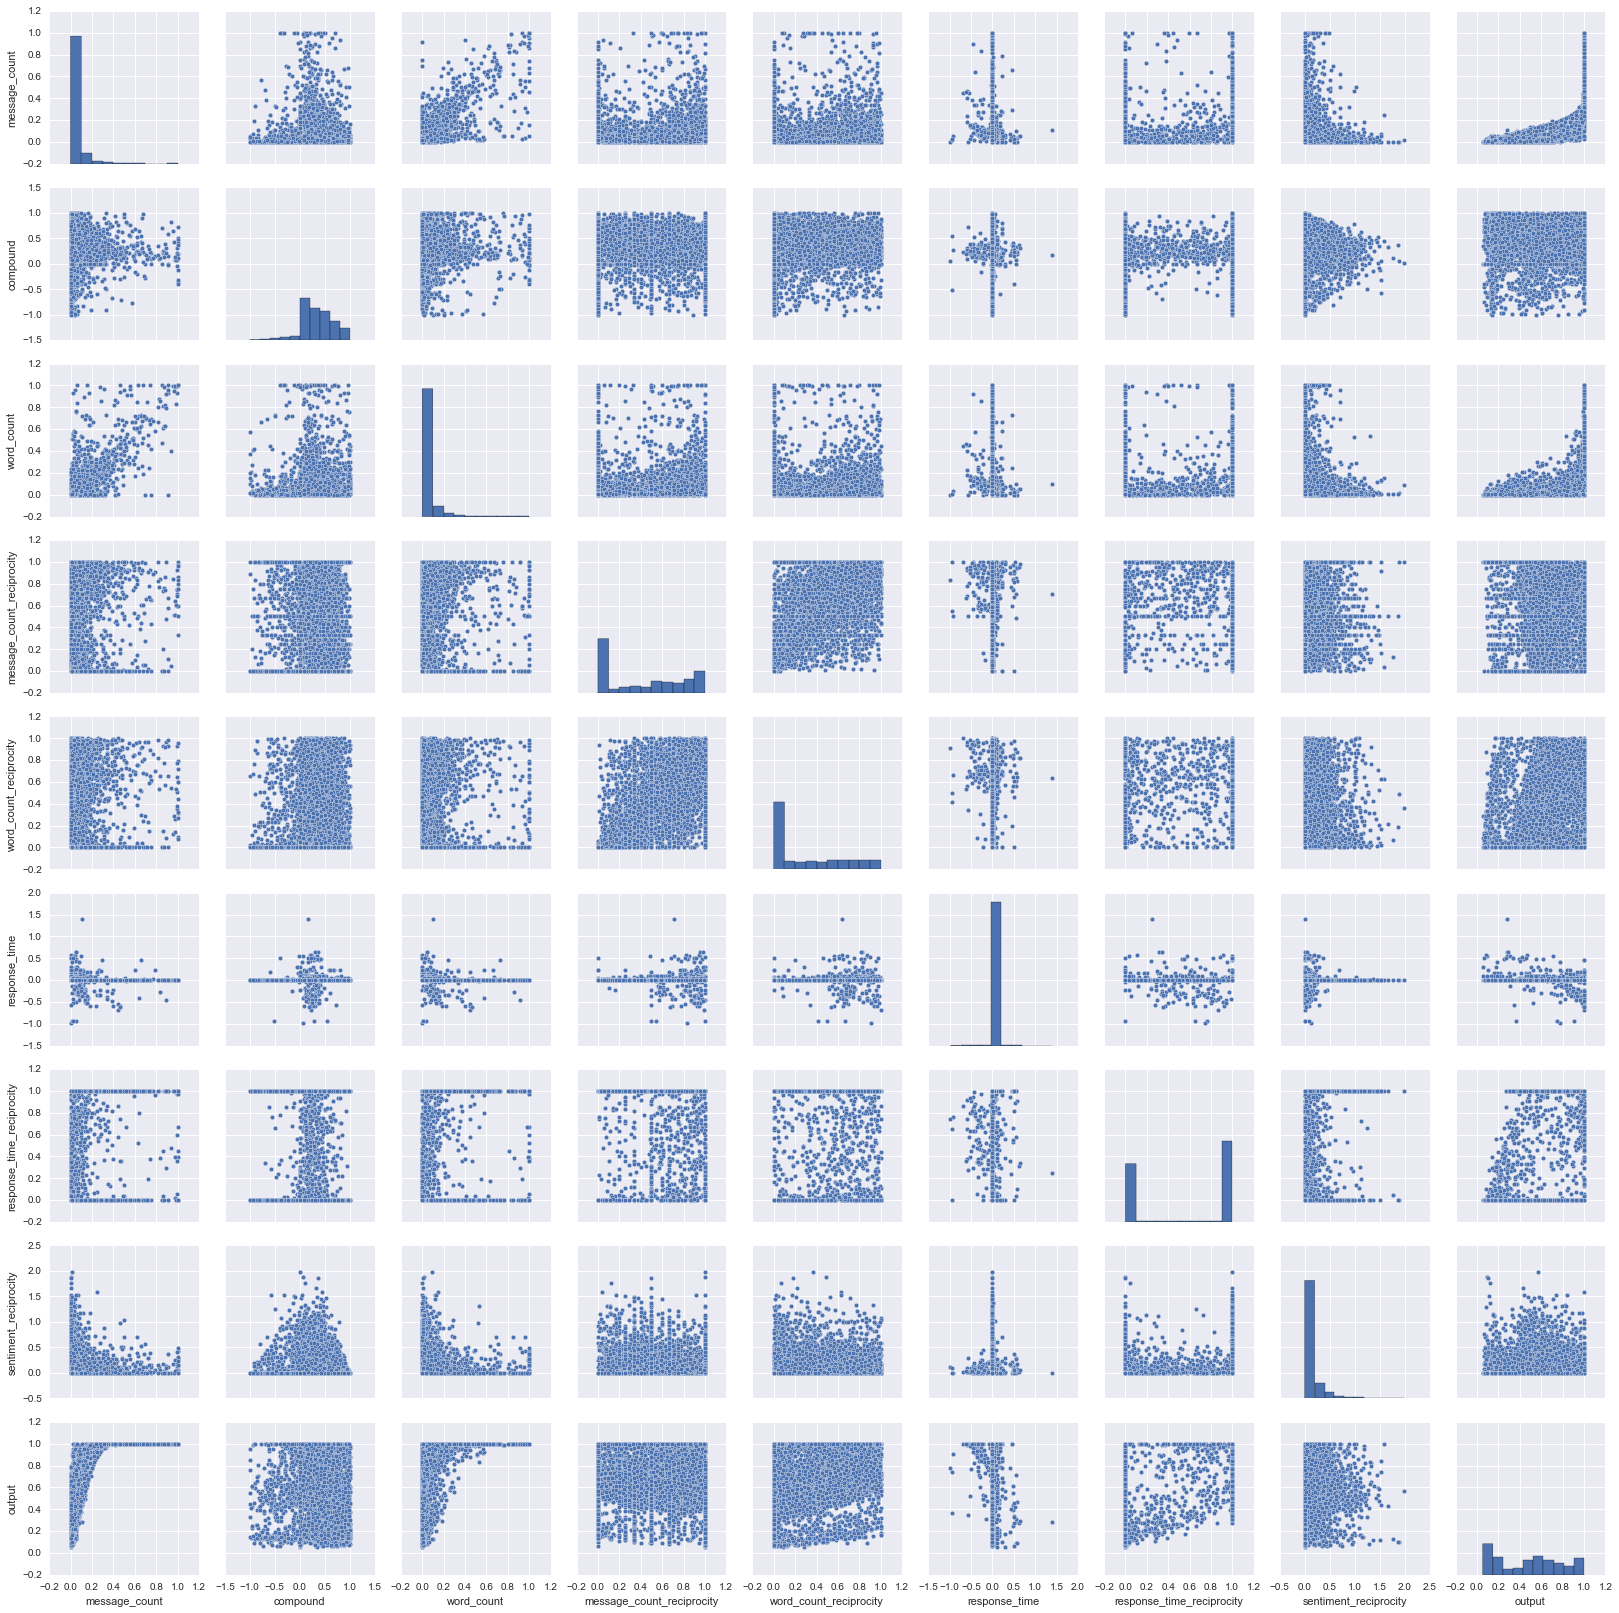

In [102]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline  


s = sns.pairplot(df)